# Clasification

In [23]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

(300, 2) (300,) (240, 2) (240,) (60, 2) (60,)


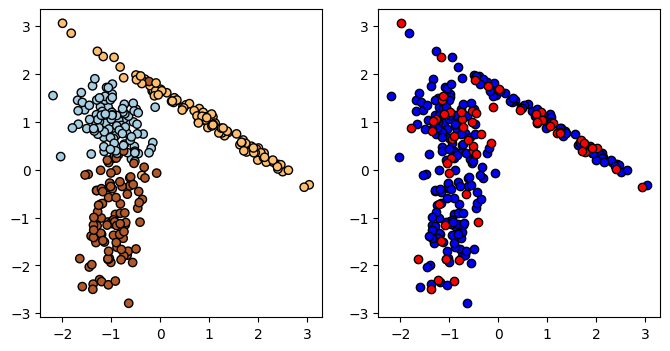

In [24]:
# we create 100 separable points
X, y = make_classification(n_samples = 300, n_features=2, n_classes = 3,
                           n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, random_state=9)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

print(X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Plot train / test data
_, axes = plt.subplots(1,2, figsize = (8,4))

axes[0].scatter(X[:,0], X[:,1], c = y, edgecolors='k', cmap='Paired')
axes[1].scatter(X_train[:,0], X_train[:,1], c = 'b', edgecolors='k')
axes[1].scatter(X_test[:,0], X_test[:,1], c = 'r', edgecolors='k')

In [66]:
def plot_predict_model(dataPred_x, dataPred_y,
                       dataTrain_x=None, dataTrain_y=None,
                       ax=None, model='linear', kernel='svc', offset=0.5,
                       n_neighbors = 7 ):

  import numpy as np
  kernels = ['linear', 'poly', 'rbf', 'sigmoid']

  if dataPred_x.shape[1] == 2:
    h_min = min(dataPred_x[:, 0]) - offset
    h_max = max(dataPred_x[:, 0]) + offset

    v_min = min(dataPred_x[:, 1]) - offset
    v_max = max(dataPred_x[:, 1]) + offset

    h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 100),
                                np.linspace(v_min, v_max, 100))

  if ax is None:
      _, ax = plt.subplots(figsize=(5, 4))

#Conditional predict model
  #logistic regresion
  if model == 'logisticRegression':
    #---Imports---#
    from sklearn.linear_model import LogisticRegression
    clf = LogisticRegression()

  #Type model Naive Bayes
  if model == 'naive_bayes':
    #---Imports---#
    from sklearn.naive_bayes import GaussianNB
    clf=GaussianNB()

  #Type model KNN
  if model == 'knn':
    #---Imports---#
    from sklearn.neighbors import KNeighborsClassifier as kNN
    clf = kNN(n_neighbors = n_neighbors , metric = "euclidean")

  #Type model SVC
  if model in kernels and kernel=='svc':
    #---Imports---#
    from sklearn.svm import SVC
    clf = SVC(kernel = model , gamma = 1)

  #Type model SVR
  if model in kernels and kernel=='svr':
    #---Imports---#
    from sklearn.svm import SVR
    clf = SVR(kernel = model , gamma = 1)

  #Train model
  if dataPred_x.shape[1] == 2:
    if dataTrain_x is None and dataTrain_y is None:
      clf.fit(dataPred_x, dataPred_y)
    else:
      clf.fit(dataTrain_x, dataTrain_y)

  else:
    clf.fit( dataPred_x.reshape(-1, 1) , dataPred_y )
    line_x = np.linspace(dataPred_x.min(),
    dataPred_x.max(), 100).reshape(-1, 1)
    line_y = clf.predict(line_x)

  #Predict Model
  if dataPred_x.shape[1] == 2:
    pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
    pred_grid = pred_grid.reshape(h_grid.shape)
  else:
    pred_grid = clf.predict( dataPred_x.reshape(-1, 1) )

  #Metric pred in a hot map
  accuracy = clf.score(dataPred_x, dataPred_y)
  ax.set_title('Accuracy: {:.2f}'.format(accuracy))


  #Graphic background color
  if dataPred_x.shape[1] == 2:
    ax.pcolormesh(h_grid, v_grid, pred_grid, cmap='Paired')
    ax.scatter(dataPred_x[:, 0], dataPred_x[:, 1], c=dataPred_y,
              edgecolors='k', cmap='Paired')
  else:
    ax.scatter( dataPred_x , dataPred_y , color = 'blue')
    ax.plot( line_x, line_y, color = 'green')

UnboundLocalError: cannot access local variable 'precision_score' where it is not associated with a value

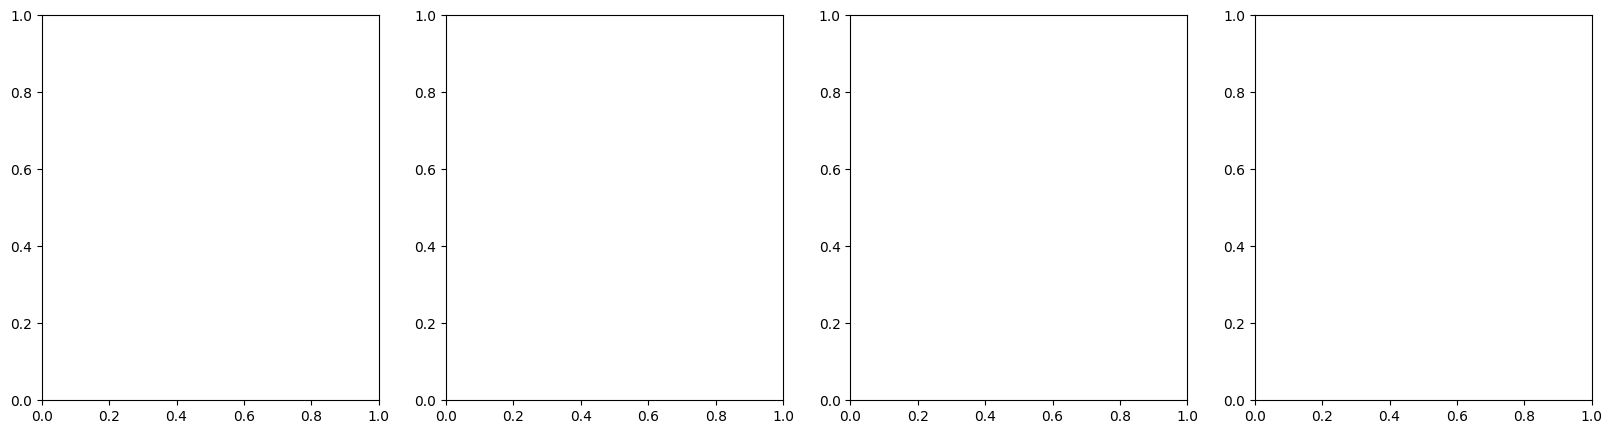

In [67]:
##create object with models models = ['KNN (k=5)', 'Logistic Regression', 'SVM (poly)', 'SVM (rbf)']

object_models = {
    'KNN (k=5)': {'model': 'knn', 'n_neighbors': 5},
    'Logistic Regression': {'model': 'logisticRegression'},
    'SVM (poly)': {'model': 'poly', 'kernel': 'svc'},
    'SVM ( rbf )': {'model': 'rbf', 'kernel': 'svc'}
}

_, axes = plt.subplots(1, len(object_models), figsize=(20, 5))

for i, (name, params) in enumerate(object_models.items()):
    plot_predict_model(dataTrain_x = X_train, dataTrain_y=y_train,
                       dataPred_x=X_test, dataPred_y=y_test,
                       offset=0.01, ax=axes[i], **params)

    axes[i].set_title(name)

In [ ]:
models = [ _ , _ , _ ]

_, axes = plt.subplots(1,3, figsize = (20,5))
preds = {}

# fit the models
for _ in _ :
    #
    clf = _
    clf.fit( _ , _ )

    # Plot everything

plt.show()

## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for KNN (k=5) -----########


InvalidParameterError: The 'y_true' parameter of precision_score must be an array-like or a sparse matrix. Got <Figure size 1600x400 with 4 Axes> instead.

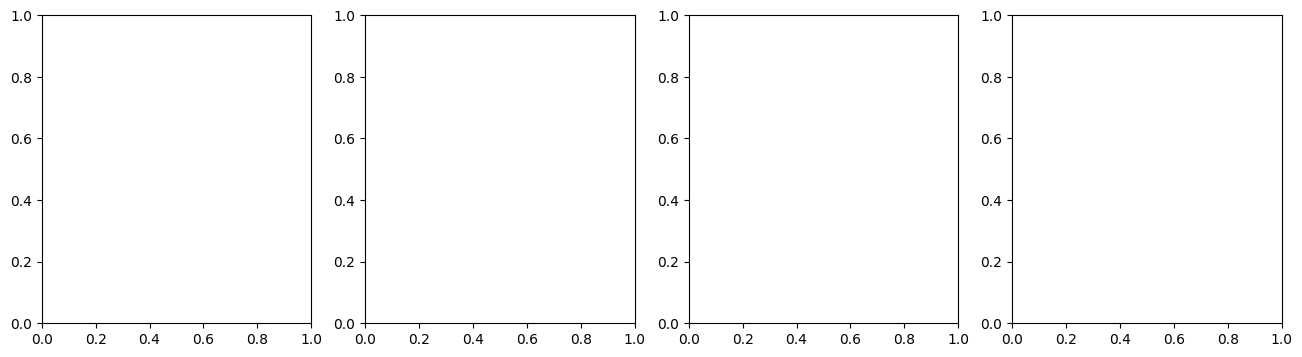

In [42]:
_, axes = plt.subplots(1, 4 , figsize = (16,4))

# Compute metrics - plot confusion matrix
for i, (name, params) in enumerate(object_models.items()):
  print ("########----- Results for {0} -----########".format(name))
  accuracy = accuracy_score( y_test , pred[name] )
  precision = precision_score( y_test , pred[name] , average = "micro")
  recall = recall_score( y_test , pred[name] , average = "micro")
  f1 = f1_score( y_test , pred[name] , average = "micro")
  cm = confusion_matrix( y_test , pred[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = _ )
  axes[i].set_title( _ )

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


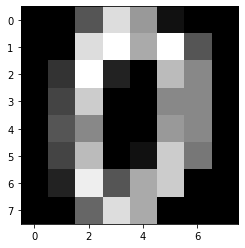

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_regression(n_samples = 1000, n_features = _ , noise = _ , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

# Plot train / test data
_

In [ ]:
# Train a linear regression



## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Compute MAE and MSE